# 1. Analysing Olist DB 

# 2. EDA Reviews

## Data structures and types - Reviews

In [1]:
from pathlib import Path
import pandas as pd

BASE_DIR = Path.cwd()
RAW_DATA = BASE_DIR / "data" / "raw"

# Orders

In [2]:
orders_df = pd.read_csv(RAW_DATA / "olist_orders_dataset.csv")

print("Shape of orders_df:", "\n")
print(orders_df.shape)
print("Overview:", "\n")
orders_df.head()

Shape of orders_df: 

(99441, 8)
Overview: 



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
print("Info:", "\n")
print(orders_df.info())


Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


Observation:
Columns: `order_id`, `customer_id`, and `order_status` should be treated as objects, while the remaining columns   must be cast to datetime64 to enable time-series analysis

In [4]:
print(orders_df.isna().sum().sort_values(ascending=False))


order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
order_purchase_timestamp            0
order_status                        0
customer_id                         0
order_estimated_delivery_date       0
dtype: int64


In [5]:
print(orders_df["order_status"].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


# Customers


In [6]:
customers_df = pd.read_csv(RAW_DATA / "olist_customers_dataset.csv")
print("Shape of customers:", "\n")
print(customers_df.shape)
print("Overview:", "\n")
customers_df.head()

Shape of customers: 

(99441, 5)
Overview: 



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
print("Info:", "\n")
print(customers_df.info())

Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


In [8]:
print(customers_df.isna().sum().sort_values(ascending=False))

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [9]:
print(customers_df["customer_city"].value_counts())

print(customers_df["customer_id"].nunique())

customers_df["customer_unique_id"].nunique()

customer_city
sao paulo                   15540
rio de janeiro               6882
belo horizonte               2773
brasilia                     2131
curitiba                     1521
                            ...  
olhos d'agua                    1
pacotuba                        1
sao sebastiao do paraiba        1
benedito leite                  1
campos verdes                   1
Name: count, Length: 4119, dtype: int64
99441


96096

**Observations**

- `customer_id` does not represent a unique customer.
- `customer_unique_id` identifies the real customer across multiple purchases.
- A single `customer_unique_id` can be associated with multiple `customer_id`s.
- The `customer_id` is used as a technical key to link customers with orders, while `customer_unique_id` should be used for customer-level analysis such as repeat purchases or customer lifetime value.

In [10]:
print("Customer state: unique values:", customers_df["customer_state"].nunique())

print("\n", customers_df["customer_state"].value_counts())

Customer state: unique values: 27

 customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


# Order items


In [11]:
order_items_df = pd.read_csv(RAW_DATA / "olist_order_items_dataset.csv")

print("Shape of items from order:", "\n")
print(order_items_df.shape)
print("Overview:", "\n")
order_items_df.head()

Shape of items from order: 

(112650, 7)
Overview: 



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
order_items_df.info()
print(order_items_df.describe(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         

In [13]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [14]:
print("\n", order_items_df["order_id"].nunique())
print("\n", "Each group = an order:")
order_items_df.groupby("order_id").size().describe()


 98666

 Each group = an order:


count    98666.000000
mean         1.141731
std          0.538452
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
dtype: float64

**Observation**
The number of items per order was analyzed grouping `order_items` by `order_id`.

Most of the orders contains a single item, with a small portion of them having multiple products.
The distribution show a clearly strong skew 

# Payments

In [15]:
payments_df = pd.read_csv(RAW_DATA / "olist_order_payments_dataset.csv")
print("Shape of payments:", "\n")
print(payments_df.shape)
print("Overview:", "\n")
payments_df.head()

Shape of payments: 

(103886, 5)
Overview: 



,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Each row in the payments dataset represents a payment transaction associated with an order.


In [16]:
payments_df.info()

print(payments_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.0000

In [17]:
print(payments_df["payment_type"].value_counts())
payments_df["payment_type"].value_counts(normalize=True) * 100


payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


payment_type
credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: proportion, dtype: float64

In [18]:
payments_df["payment_value"].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

Average > Median → right-skewed

In [19]:
installments_count = payments_df["payment_installments"].value_counts()
installments_percentage = (
    payments_df["payment_installments"].value_counts(normalize=True) * 100
).round(2)
installment_summary = pd.concat([installments_count, installments_percentage], axis=1)
installment_summary.columns = ["Quantity", "Percentage"]
print("\n", installment_summary)
payments_df["payment_installments"].describe()



                       Quantity  Percentage
payment_installments                      
1                        52546       50.58
2                        12413       11.95
3                        10461       10.07
4                         7098        6.83
10                        5328        5.13
5                         5239        5.04
8                         4268        4.11
6                         3920        3.77
7                         1626        1.57
9                          644        0.62
12                         133        0.13
15                          74        0.07
18                          27        0.03
11                          23        0.02
24                          18        0.02
20                          17        0.02
13                          16        0.02
14                          15        0.01
17                           8        0.01
16                           5        0.00
21                           3        0.00
0        

count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

In [20]:
print("\n", payments_df.groupby("order_id")["payment_value"].sum().describe())

payments_df.groupby("order_id").size().describe()


 count    99440.000000
mean       160.990267
std        221.951257
min          0.000000
25%         62.010000
50%        105.290000
75%        176.970000
max      13664.080000
Name: payment_value, dtype: float64


count    99440.000000
mean         1.044710
std          0.381166
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         29.000000
dtype: float64

Payment values were aggregated at the order level to compute the total amount paid per order.  
While most orders have a positive payment value, some orders show a total payment value of zero, which may be related to vouchers, promotions, or canceled transactions.  

Additionally, most orders are associated with a single payment record, although a small number of orders involve multiple payment transactions.

**Observations**

- Payments are recorded at the transaction level, not at the order level.
- Orders may include multiple payment records.
- Credit cards are the predominant payment method.
- Payment amounts are right-skewed, with a small number of high-value orders.
- Aggregation is required prior to merging with the orders table.


# 2. Reviews

## 2.1 Objective:
Understanding customers satisfaction through the column `review_score` and exploring  associated signals (response time, late delivery)

### 2.1.2 Guiding questions

What is the distribution of review scores (is there any polarization?)?

Do the scores change over time? (monthly trend)

Is response time associated with worse scores?

What proportion of reviews go unanswered?

(If you merge with orders) Does delivery delay increase negative reviews?

### 2.1.3 key variables and grain

`review_id`: ID review

`order_id`: Associated order

`review_score`: Customer rating (1–5)

`review_creation_date`: Date when client left the review

`review_answer_timestamp`: The Date when platform answered 

1 row = 1 reviews. An order_id could have more than 1 review

## 2.2 Data structure and quality

In [21]:
reviews_df = pd.read_csv(RAW_DATA / "olist_order_reviews_dataset.csv")
print("Shape of payments:", "\n")
print(reviews_df.shape)
print("Overview:", "\n")
reviews_df.head()

Shape of payments: 

(99224, 7)
Overview: 



,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Each row in the reviews dataset represents a customer review associated with an order.


In [22]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [23]:
reviews_df.isna().sum()


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

There are not presence of comments in each order for logic reasons. This doesn't mean that the df contains null data. 

### 2.2.1 Grain checks / duplicates / keys

In [24]:
unique_reviews = reviews_df["review_id"].nunique()
duplicated_reviews = len(reviews_df)
reviews_duplicated_percentage = (reviews_df.groupby("review_id").size() > 1).mean()
print("Cheking reviews duplicated:", reviews_duplicated_percentage)
print(
    "Approximately duplicated orders:", (unique_reviews * reviews_duplicated_percentage)
)
print("Duplicated orders:", len(reviews_df) - unique_reviews)

Cheking reviews duplicated: 0.008017477898587541
Approximately duplicated orders: 789.0
Duplicated orders: 814


In [25]:
unique_orders = reviews_df["order_id"].nunique()
print(unique_orders)
print(len(reviews_df))
orders_duplicated_percentage = (reviews_df.groupby("order_id").size() > 1).mean()
print("Cheking orders duplicated:", orders_duplicated_percentage)
print(
    "Approximately duplicated orders:", (unique_orders * orders_duplicated_percentage)
)
print("Duplicated orders:", len(reviews_df) - unique_orders)
reviews_df.groupby("order_id").size().describe()

98673
99224
Cheking orders duplicated: 0.00554356308209946
Approximately duplicated orders: 547.0
Duplicated orders: 551


count    98673.000000
mean         1.005584
std          0.075060
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
dtype: float64

Most of orders receive a single review, a few ones are associated with multiple reviews. 

### 2.2.2 Lack of data

In [26]:
reviews_df["review_comment_message"].isna().value_counts()

review_comment_message
True     58247
False    40977
Name: count, dtype: int64

## 2.3 Review score distribution

count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64
              Quantity  Percentage
review_score                      
5                57328       57.78
4                19142       19.29
1                11424       11.51
3                 8179        8.24
2                 3151        3.18
KPI Bad review: <= 2
14575

Bad reviews (score<=2): 14575 (14.69%)


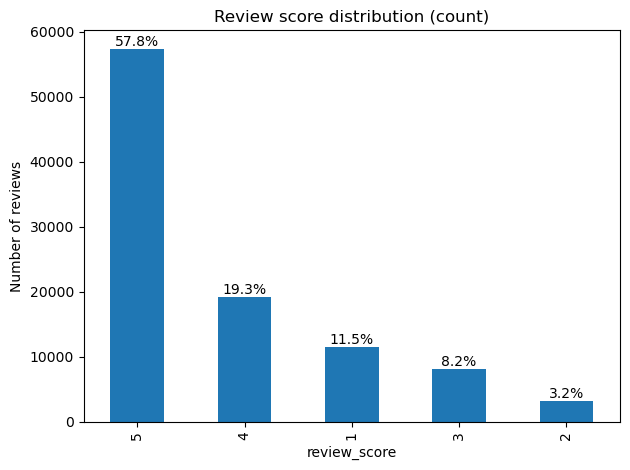

In [27]:
import matplotlib.pyplot as plt

scores = reviews_df["review_score"].dropna()
reviews_score_percentage = (scores.value_counts(normalize=True) * 100).round(2)
reviews_score_count = scores.value_counts()

review = pd.concat([reviews_score_count, reviews_score_percentage], axis=1)
review.columns = ["Quantity", "Percentage"]
print(scores.describe())
print(review)

print("KPI Bad review: <= 2")
bad_review_mask = scores <= 2
bad_review_count = int(bad_review_mask.sum())
print(bad_review_count)
bad_review_pct = bad_review_mask.mean() * 100

print(f"\nBad reviews (score<=2): {bad_review_count} ({bad_review_pct:.2f}%)")

ax = reviews_score_count.plot(kind="bar")
ax.set_title("Review score distribution (count)")
ax.set_xlabel("review_score")
ax.set_ylabel("Number of reviews")


for i, score in enumerate(reviews_score_count.index):
    count = reviews_score_count.loc[score]
    percentage = reviews_score_percentage.loc[score]
    ax.text(i, count, f"{percentage:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

The distribution of review scores is polarized, a high concentration of both very positive (5) and very negative (1) ratings.


## 2.4 Temporal Analysis – Reviews

### 2.4.1 **Date Parsing**

Review timestamps were originally stored as string objects and were converted to datetime format to enable temporal analysis.  
Missing values in response timestamps indicate reviews that did not receive an answer.


In [28]:
reviews_df["review_creation_date"] = pd.to_datetime(
    reviews_df["review_creation_date"], errors="coerce"
)

reviews_df["review_answer_timestamp"] = pd.to_datetime(
    reviews_df["review_answer_timestamp"], errors="coerce"
)

In [29]:
reviews_df.columns
date_cols = ["review_creation_date", "review_answer_timestamp"]
ranges = reviews_df[date_cols].agg(["min", "max"])
missing_dates = reviews_df[date_cols].isna().sum()

print("Date ranges:", ranges)
print("Missing values:", missing_dates)


Date ranges:     review_creation_date review_answer_timestamp
min           2016-10-02     2016-10-07 18:32:28
max           2018-08-31     2018-10-29 12:27:35
Missing values: review_creation_date       0
review_answer_timestamp    0
dtype: int64


The dataset covers reviews created between 2016-10-02 and 2018-08-31 and responses recorded up to Oct 29 2018
There are no missing timestamps, allowing for the calculation of time metrics (response time) 

In [30]:
reviews_monthly = reviews_df.set_index("review_creation_date").resample("ME").size()

reviews_monthly.head()

review_creation_date
2016-10-31     179
2016-11-30     101
2016-12-31      45
2017-01-31     239
2017-02-28    1413
Freq: ME, dtype: int64

<Axes: title={'center': 'Monthly number of reviews'}, xlabel='review_creation_date'>

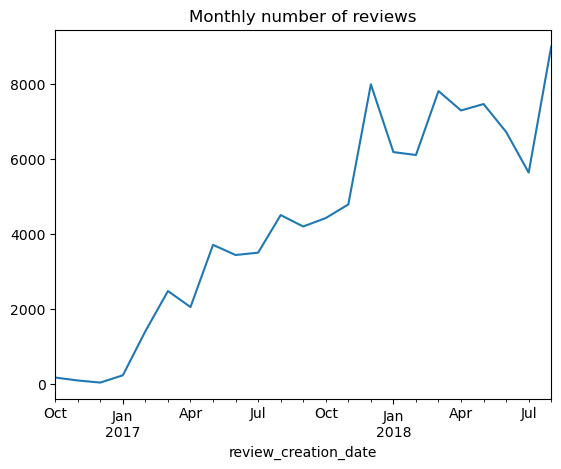

In [31]:
reviews_monthly.plot(title="Monthly number of reviews")


In [32]:
avg_score_monthly = (
    reviews_df.set_index("review_creation_date").resample("ME")["review_score"].mean()
)

avg_score_monthly.head()

review_creation_date
2016-10-31    4.055866
2016-11-30    3.188119
2016-12-31    2.355556
2017-01-31    4.338912
2017-02-28    4.280962
Freq: ME, Name: review_score, dtype: float64

<Axes: title={'center': 'Average Review Score Over Time'}, xlabel='review_creation_date'>

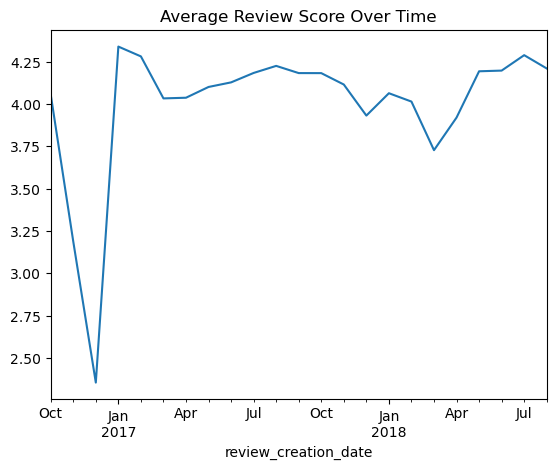

In [33]:
avg_score_monthly.plot(title="Average Review Score Over Time")


In [34]:
print("\n", reviews_df.info())
reviews_df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB

 None


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

There are not negative time responses (type error or validation)

Response time frequency analysis shows that most reviews are answered within 1 to 3 days, with a strong peak at one day.  
A significant number of reviews present a response time of zero days (second highest), which correspond to same-day responses.

## 2.5 Response time analysis

### 2.5.1 Feature creation


In [35]:
reviews_df["response_time"] = (
    reviews_df["review_answer_timestamp"] - reviews_df["review_creation_date"]
)
reviews_df["response_time_days"] = (
    reviews_df["response_time"].dt.total_seconds() / 86400
)
print(reviews_df["response_time"].head())
reviews_df["response_time_days"]

0   0 days 21:46:59
1   1 days 03:05:13
2   1 days 14:36:24
3   0 days 22:02:06
4   1 days 10:26:53
Name: response_time, dtype: timedelta64[ns]


0        0.907627
1        1.128623
2        1.608611
3        0.918125
4        1.435336
           ...   
99219    7.721181
99220    2.837986
99221    1.382442
99222    1.541123
99223    0.876262
Name: response_time_days, Length: 99224, dtype: float64

In [36]:
print(reviews_df["response_time_days"].describe())
reviews_df["response_time_days"].quantile([0.60, 0.80, 0.90, 0.95, 0.99])


count    99224.000000
mean         3.148993
std          9.890049
min          0.089225
25%          1.004870
50%          1.674948
75%          3.103565
max        518.699213
Name: response_time_days, dtype: float64


0.60     2.516484
0.80     3.527704
0.90     4.856353
0.95     6.972190
0.99    22.070849
Name: response_time_days, dtype: float64

Median is better than mean due to skewness

long tail suggest rare but extreme response delays

### 2.5.2 Data quality checks

In [37]:
print(reviews_df["response_time"].isna().mean())

print((reviews_df["response_time"] < pd.Timedelta(0)).sum())

print(reviews_df["response_time_days"].value_counts().head(7))
reviews_df["response_time_days"].value_counts().sort_index().head(7)

0.0
0
response_time_days
1.030938    7
0.983738    6
1.025185    6
1.054051    6
0.968183    6
1.046030    6
1.453715    6
Name: count, dtype: int64


response_time_days
0.089225    1
0.100278    1
0.100914    1
0.101539    1
0.102280    1
0.102963    1
0.103333    1
Name: count, dtype: int64

### 2.5.3 Global Distribution

In [38]:
import importlib
import pandas as pd

importlib.reload(pd)

bins = [-1, 0, 1, 2, 3, 4, 5, 7, 14, 30, 90, 365]
bins_cut = pd.cut(reviews_df["response_time_days"], bins=bins)


response_time_bins = pd.DataFrame(
    {
        "Counts": bins_cut.value_counts().sort_index(),
        "%": (bins_cut.value_counts(normalize=True).sort_index() * 100).round(2),
    }
)
response_time_bins

,Counts,%
response_time_days,,
"(-1, 0]",0,0.00
"(0, 1]",24361,24.55
"(1, 2]",30995,31.24
"(2, 3]",15898,16.02
"(3, 4]",14063,14.17
"(4, 5]",4600,4.64
"(5, 7]",4393,4.43
"(7, 14]",3086,3.11
"(14, 30]",1146,1.16


In [39]:
reviews_df["rt_days_round1"] = reviews_df["response_time_days"].round()
reviews_df["rt_days_round1"].value_counts().head(10)

rt_days_round1
1.0    39520
3.0    19394
2.0    16820
4.0     8385
5.0     3846
0.0     2844
6.0     2349
7.0     1459
8.0      804
9.0      539
Name: count, dtype: int64

The next day and day after tomorrow predominates (1 and 2).  

In [40]:
n = reviews_df["response_time_days"].notna().sum()

porcentage_responses_under1d = (reviews_df["response_time_days"] < 1).sum() / n * 100
porcentage_responses_under2d = (reviews_df["response_time_days"] < 2).sum() / n * 100

porcentage_over_30d = (reviews_df["response_time_days"] > 30).sum() / n * 100

print("Responses under 1d:", porcentage_responses_under1d)
print("Responses under 2d:", porcentage_responses_under2d)

print("Responses over 30 days:", porcentage_over_30d)

Responses under 1d: 24.551519793598324
Responses under 2d: 55.788922034991536
Responses over 30 days: 0.6873337095863904


Only 0.68% of reviews have a response greater than 30days, indicating that extreme day delays are rare and would be treated as outliers

### 2.5.4 Trend by review creation month
 

Creation date trend = client experience

In [41]:
# .dt access for treat the review_creation_date data like date
reviews_df["review_weekday"] = reviews_df["review_creation_date"].dt.day_name()
weekday_counts = reviews_df["review_weekday"].value_counts()

monthly = reviews_df.set_index("review_creation_date").resample("ME")[
    "response_time_days"
]
monthly_count = monthly.size()
monthly_median = monthly.median()
monthly_p90 = monthly.quantile(0.9)
monthly_top10 = monthly_count.nlargest(10)
print(weekday_counts)


review_weekday
Wednesday    19156
Thursday     18825
Tuesday      18139
Friday       17770
Saturday     17766
Sunday        6475
Monday        1093
Name: count, dtype: int64


review_creation_date
2016-10-31     179
2016-11-30     101
2016-12-31      45
2017-01-31     239
2017-02-28    1413
2017-03-31    2481
2017-04-30    2055
2017-05-31    3710
2017-06-30    3440
2017-07-31    3503
Freq: ME, Name: response_time_days, dtype: int64
review_creation_date
2018-08-31    8987
2017-12-31    7982
2018-03-31    7803
2018-05-31    7458
2018-04-30    7287
2018-06-30    6715
2018-01-31    6179
2018-02-28    6101
2018-07-31    5634
2017-11-30    4786
Name: response_time_days, dtype: int64


<Axes: title={'center': 'Number of reviews (with response_time) per month'}, xlabel='review_creation_date'>

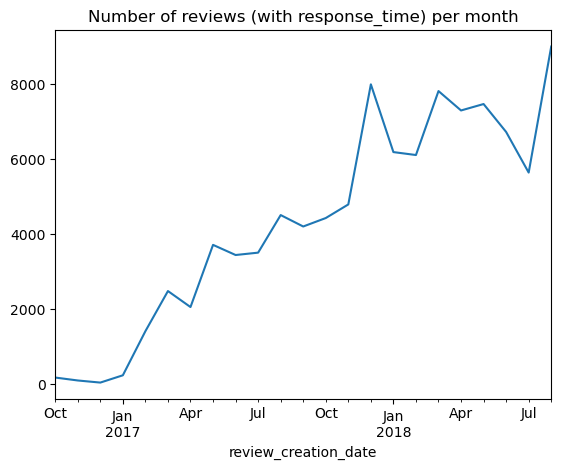

In [42]:
print(monthly_count.head(10))
print(monthly_top10.sort_values(ascending=False))
monthly_count.plot(title="Number of reviews (with response_time) per month")


review_creation_date
2016-10-31    1.802650
2016-11-30    2.597211
2016-12-31    2.399155
2017-01-31    1.673935
2017-02-28    1.722917
Freq: ME, Name: response_time_days, dtype: float64


<Axes: title={'center': 'Median response time (days) per month'}, xlabel='review_creation_date'>

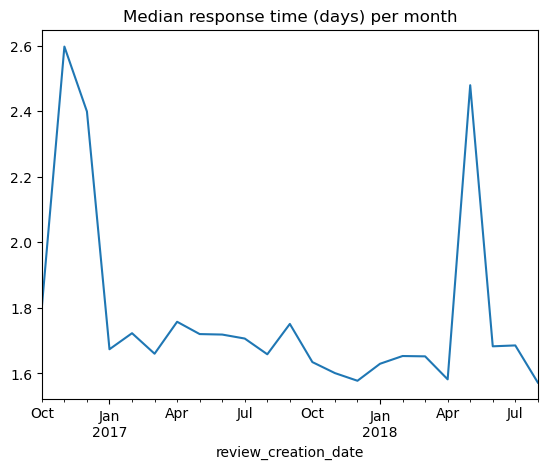

In [43]:
print(monthly_median.head())

monthly_median.plot(title="Median response time (days) per month")


review_creation_date
2016-10-31    12.223819
2016-11-30     8.082025
2016-12-31    15.539852
2017-01-31     3.956444
2017-02-28     5.006942
2017-03-31     4.741377
2017-04-30     5.027942
2017-05-31     4.941963
2017-06-30     4.635316
2017-07-31     4.815086
Freq: ME, Name: response_time_days, dtype: float64
23


<Axes: title={'center': 'P90 response time (days) per month'}, xlabel='review_creation_date'>

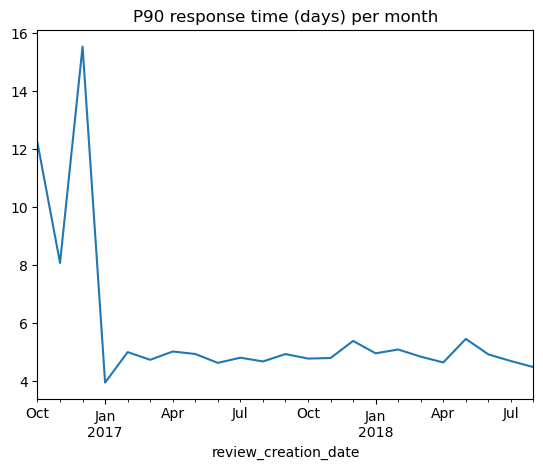

In [44]:
print(monthly_p90.head(10))
print(monthly_p90.count())

monthly_p90.plot(title="P90 response time (days) per month")

review_creation_date
2018-08-31    8987
2017-12-31    7982
2018-03-31    7803
2018-05-31    7458
2018-04-30    7287
2018-06-30    6715
2018-01-31    6179
2018-02-28    6101
2018-07-31    5634
2017-11-30    4786
2017-08-31    4503
2017-10-31    4424
2017-09-30    4199
2017-05-31    3710
2017-07-31    3503
2017-06-30    3440
2017-03-31    2481
2017-04-30    2055
2017-02-28    1413
2017-01-31     239
2016-10-31     179
2016-11-30     101
2016-12-31      45
Name: response_time_days, dtype: int64


<Axes: title={'center': 'Count response time over months'}, xlabel='review_creation_date'>

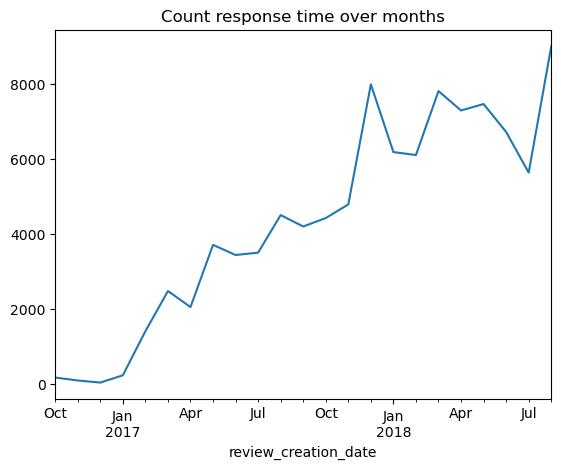

In [45]:
print(monthly.size().sort_values(ascending=False))

monthly.size().plot(title="Count response time over months")

count    99224.000000
mean         3.148993
std          9.890049
min          0.089225
25%          1.004870
50%          1.674948
75%          3.103565
max        518.699213
Name: response_time_days, dtype: float64


<Axes: title={'center': 'Response time (days) <= 30'}, ylabel='Frequency'>

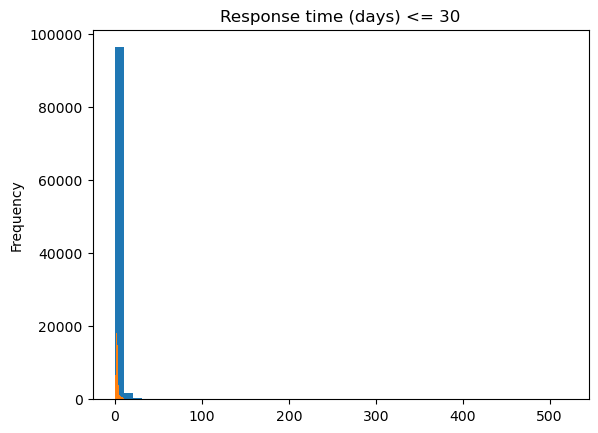

In [46]:
# Distribución global
print(reviews_df["response_time_days"].describe())
reviews_df["response_time_days"].plot(
    kind="hist", bins=50, title="Response time (days) distribution"
)

# Hist truncado a <=30 días (para ver el cuerpo sin cola)
mask = reviews_df["response_time_days"] <= 30
reviews_df.loc[mask, "response_time_days"].plot(
    kind="hist", bins=50, title="Response time (days) <= 30"
)


### 2.5.5 Trend by answer month

Answer date trend = operational perfomance

In [47]:
reviews_df.columns
reviews_df_check = reviews_df.dropna(
    subset=["review_answer_timestamp", "review_creation_date"]
)
monthly_answer = reviews_df_check.set_index("review_answer_timestamp")[
    "response_time_days"
].resample("ME")
monthly_answer_count = monthly_answer.count()
monthly_answer_median = monthly_answer.median()
monthly_answer_p90 = monthly_answer.quantile(0.9)

review_answer_timestamp
2018-10-31      36
2018-09-30     632
2018-08-31    8816
2018-07-31    5831
2018-06-30    6366
2018-05-31    7518
2018-04-30    7619
2018-03-31    7656
2018-02-28    6096
2018-01-31    6273
Freq: -1ME, Name: response_time_days, dtype: int64
25


<Axes: title={'center': 'Monthly count of answered reviews'}, xlabel='review_answer_timestamp'>

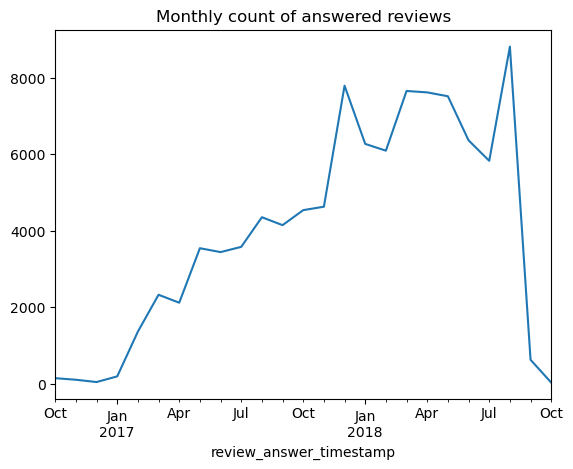

In [48]:
print(monthly_answer_count.sort_index(ascending=False).head(10))
print(monthly_answer_count.count())

monthly_answer_count.plot(title="Monthly count of answered reviews")

review_answer_timestamp
2016-10-31     1.538507
2016-11-30     2.845139
2016-12-31     2.457795
2017-01-31     1.551678
2017-02-28     1.663715
2017-03-31     1.610764
2017-04-30     1.766620
2017-05-31     1.693924
2017-06-30     1.696105
2017-07-31     1.712512
2017-08-31     1.657095
2017-09-30     1.692135
2017-10-31     1.664954
2017-11-30     1.568709
2017-12-31     1.540666
2018-01-31     1.736458
2018-02-28     1.647841
2018-03-31     1.588767
2018-04-30     1.652049
2018-05-31     2.517483
2018-06-30     1.610295
2018-07-31     1.830174
2018-08-31     1.542650
2018-09-30     3.668021
2018-10-31    70.351134
Freq: ME, Name: response_time_days, dtype: float64


<Axes: title={'center': 'Median response time of answered reviews'}, xlabel='review_answer_timestamp'>

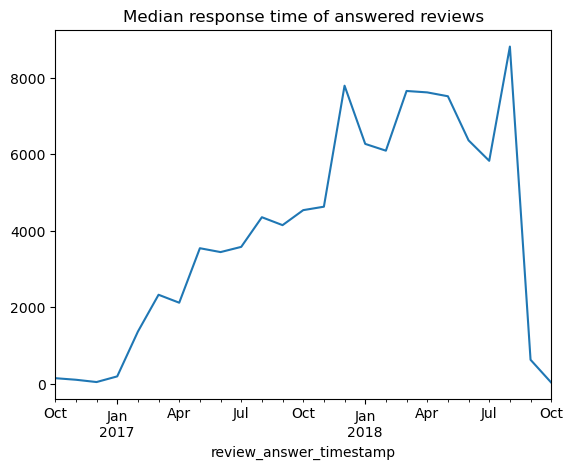

In [49]:
print(monthly_answer_median)
monthly_answer_count.plot(title="Median response time of answered reviews")


review_answer_timestamp
2016-10-31      4.037801
2016-11-30     10.671420
2016-12-31     11.415622
2017-01-31      3.785108
2017-02-28      3.902285
2017-03-31      4.695255
2017-04-30      4.943604
2017-05-31      4.644560
2017-06-30      4.689977
2017-07-31      4.606918
2017-08-31      4.752991
2017-09-30      4.836920
2017-10-31      4.752251
2017-11-30      4.741610
2017-12-31      4.697530
2018-01-31      5.583537
2018-02-28      5.027986
2018-03-31      4.600990
2018-04-30      4.843819
2018-05-31      5.543735
2018-06-30      4.816811
2018-07-31      4.877269
2018-08-31      4.209138
2018-09-30     20.675847
2018-10-31    256.364421
Freq: ME, Name: response_time_days, dtype: float64


<Axes: title={'center': 'Monthly count of answered reviews'}, xlabel='review_answer_timestamp'>

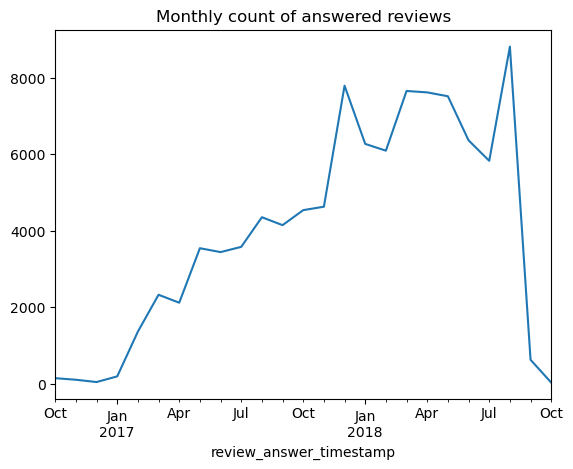

In [50]:
print(monthly_answer_p90)
monthly_answer_count.plot(title="Monthly count of answered reviews")


## 2.6 Bivariate analysis

### 2.6.1 Bivariate: review_comment_message vs review_score

In [51]:
reviews_df["has_comment_message"] = (
    reviews_df["review_comment_message"].fillna("").astype(str).str.strip().ne("")
)
reviews_df["has_comment_message_p"] = (
    reviews_df["review_comment_message"].str.strip().notna()
)

percentage_with_comments = reviews_df["has_comment_message"].mean() * 100
print(f"{percentage_with_comments} % of reviews have comments")


41.27025719583972 % of reviews have comments


Now let's see how many of comments have each `review_score`

In [52]:
print(reviews_df["has_comment_message"].value_counts())
print(reviews_df["has_comment_message_p"].value_counts())
print("Difference: ")
mask_notna = reviews_df["has_comment_message_p"]
mask_ne = ~reviews_df["has_comment_message"]
mask = reviews_df["has_comment_message_p"] & (~reviews_df["has_comment_message"])
reviews_df.loc[mask, ["review_comment_message"]].head(10)

has_comment_message
False    58274
True     40950
Name: count, dtype: int64
has_comment_message_p
False    58247
True     40977
Name: count, dtype: int64
Difference: 


,review_comment_message
10001,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n
11339,\r\n
11798,\r\n\r\n
11892,\r\n
26041,\r\n
26985,
30049,\r\n
36737,
38581,\r\n
39584,\r\n


In [53]:
pd.crosstab(
    reviews_df["review_score"],
    reviews_df["has_comment_message"],
).rename(columns={False: "no_message", True: "has_message"})

(
    pd.crosstab(
        reviews_df["review_score"], reviews_df["has_comment_message"], normalize="index"
    )
    * 100
).round(1).rename(columns={False: "no_message_%", True: "has_message_%"})

has_comment_message,no_message_%,has_message_%
review_score,,
1,23.5,76.5
2,31.9,68.1
3,56.5,43.5
4,68.8,31.2
5,64.2,35.8


#### 2.6.1.1 length of comments  by score

In [54]:
reviews_df["comment_len"] = (
    reviews_df["review_comment_message"].fillna("").astype(str).str.len()
)

(
    reviews_df[reviews_df["has_comment_message"]]
    .groupby("review_score")["comment_len"]
    .describe()[["count", "mean", "50%", "75%", "max"]]
    .rename(columns={"50%": "median"})
    .round(1)
)

,count,mean,median,75%,max
review_score,,,,,
1,8744.0,100.0,89.0,151.0,208.0
2,2145.0,96.8,88.0,144.0,203.0
3,3556.0,83.4,70.0,123.0,204.0
4,5970.0,61.8,47.0,85.0,207.0
5,20535.0,51.9,42.0,69.0,204.0


### 2.6.2 Bivariate: response_time vs review_score

 Bivariate analysis
Understand how customer satisfaction relates to operational behavior.

In [55]:
reviews_df.groupby("review_score")["response_time_days"].describe()

,count,mean,std,min,25%,50%,75%,max
review_score,,,,,,,,
1,11424.0,3.050730,10.544552,0.100278,0.761780,1.549497,2.999546,518.699213
2,3151.0,3.004119,6.493349,0.109097,0.973640,1.699745,3.116302,143.026331
3,8179.0,2.981170,6.104876,0.089225,1.020972,1.760718,3.205486,202.107870
4,19142.0,3.120431,8.893060,0.100914,1.044410,1.789045,3.410078,471.680475
5,57328.0,3.210018,10.634431,0.109734,1.016887,1.656071,3.088154,512.658067


In [56]:
reviews_df.groupby("review_score")["response_time_days"].median()

review_score
1    1.549497
2    1.699745
3    1.760718
4    1.789045
5    1.656071
Name: response_time_days, dtype: float64

Does customer satisfaction relate to response speed?

The review dataset provides valuable insight into customer satisfaction
and platform responsiveness. Review scores are generally high, with
most responses delivered within a few days. Faster response times
are weakly associated with higher satisfaction, suggesting that
operational efficiency plays a role in customer perception,
though other factors are also involved.


## 2.7 Crosstable

### 2.7.1 Reviews <-> Payments

#### Merge: Reviews <-> Payments 

In [57]:
def resolve_payment_type(x: pd.Series):
    types = pd.Series(x).dropna().unique()
    if len(types) == 1:
        return types[0]
    elif len(types) == 0:
        return pd.NA
    else:
        return "mixed"


payments_order = (
    payments_df.groupby("order_id")
    .agg(
        payment_installments=("payment_installments", "max"),
        payment_value=("payment_value", "sum"),
        payment_type=("payment_type", resolve_payment_type),
    )
    .reset_index()
)

payments_order.head()

,order_id,payment_installments,payment_value,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,2,72.19,credit_card
1,00018f77f2f0320c557190d7a144bdd3,3,259.83,credit_card
2,000229ec398224ef6ca0657da4fc703e,5,216.87,credit_card
3,00024acbcdf0a6daa1e931b038114c75,2,25.78,credit_card
4,00042b26cf59d7ce69dfabb4e55b4fd9,3,218.04,credit_card


In [58]:
len(payments_order)

99440

In [59]:
reviews_orders_payments = reviews_df.merge(payments_order, on="order_id", how="inner")
print(reviews_orders_payments.shape)
reviews_orders_payments[
    [
        "order_id",
        "review_score",
        "payment_type",
        "payment_installments",
        "payment_value",
    ]
].head()

(99223, 17)


,order_id,review_score,payment_type,payment_installments,payment_value
0,73fc7af87114b39712e6da79b0a377eb,4,credit_card,8,397.26
1,a548910a1c6147796b98fdf73dbeba33,5,credit_card,1,88.09
2,f9e4b658b201a9f2ecdecbb34bed034b,5,credit_card,1,194.12
3,658677c97b385a9be170737859d3511b,5,credit_card,1,222.84
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,credit_card,10,1333.25


#### Cross table: Review Score x Payment type  

In [60]:
cross_table_counts = pd.crosstab(
    reviews_orders_payments["payment_type"], reviews_orders_payments["review_score"]
).sort_index()
cross_table_percentage = (
    pd.crosstab(
        reviews_orders_payments["payment_type"],
        reviews_orders_payments["review_score"],
        normalize=True,
    )
    * 100
)
cross_table_percentage.round(2).sort_index()

review_score,1,2,3,4,5
payment_type,,,,,
boleto,2.25,0.63,1.71,3.91,11.43
credit_card,8.63,2.35,6.05,14.38,43.24
debit_card,0.15,0.05,0.12,0.29,0.93
mixed,0.25,0.08,0.21,0.45,1.27
not_defined,0.00,0.00,0.00,0.00,0.00
voucher,0.23,0.07,0.16,0.27,0.90


In [61]:
bins = [0, 1, 3, 6, 12, 99]
labels = ["1", "2-3", "4-6", "7-12", "13+"]

reviews_orders_payments["installment_bin"] = pd.cut(
    reviews_orders_payments["payment_installments"], bins=bins, labels=labels
)

crosstable_install_porcentage = (
    pd.crosstab(
        reviews_orders_payments["installment_bin"],
        reviews_orders_payments["review_score"],
        normalize="index",
    )
    * 100
)

display(crosstable_install_porcentage.round(2))

review_score,1,2,3,4,5
installment_bin,,,,,
1,10.87,2.98,8.10,19.66,58.39
2-3,11.26,3.30,8.29,19.88,57.27
4-6,11.84,3.45,8.66,18.78,57.28
7-12,14.06,3.36,8.19,17.39,57.00
13+,17.84,3.24,7.03,17.84,54.05


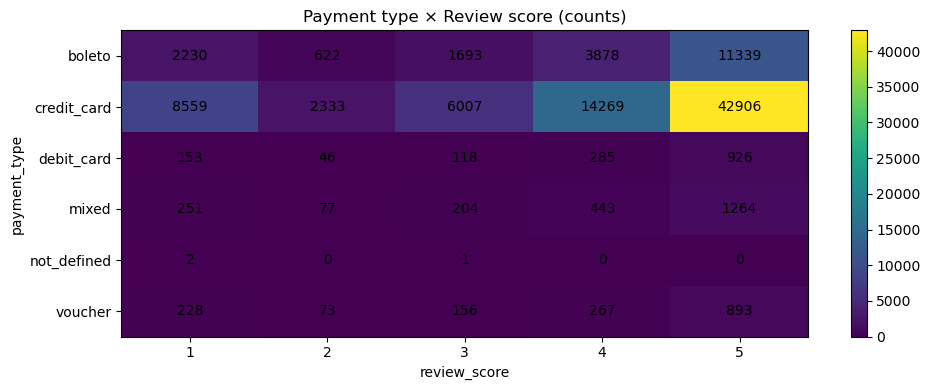

In [62]:
# Heatmap con matplotlib
data = cross_table_counts.values
fig, ax = plt.subplots(figsize=(10, 4))
im = ax.imshow(data, aspect="auto")

ax.set_xticks(range(cross_table_counts.shape[1]))
ax.set_xticklabels(cross_table_counts.columns)
ax.set_yticks(range(cross_table_counts.shape[0]))
ax.set_yticklabels(cross_table_counts.index)

ax.set_xlabel("review_score")
ax.set_ylabel("payment_type")
ax.set_title("Payment type × Review score (counts)")

# Anotar valores
for i in range(cross_table_counts.shape[0]):
    for j in range(cross_table_counts.shape[1]):
        ax.text(j, i, str(cross_table_counts.iat[i, j]), ha="center", va="center")

fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

#### How many orders have mixed payments?


In [63]:
reviews_orders_payments.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'response_time', 'response_time_days',
       'rt_days_round1', 'review_weekday', 'has_comment_message',
       'has_comment_message_p', 'comment_len', 'payment_installments',
       'payment_value', 'payment_type', 'installment_bin'],
      dtype='object')

In [64]:
mixed_rate = (reviews_orders_payments["payment_type"] == "mixed").mean() * 100

print(f"% of orders with payment_type=mixed: {mixed_rate:.2f}%")


% of orders with payment_type=mixed: 2.26%


#### The average change a lot between different methods?

In [65]:
reviews_orders_payments.groupby("payment_type")["review_score"].agg(
    ["count", "mean", "median"]
).sort_values("count", ascending=False)

,count,mean,median
payment_type,,,
credit_card,74074,4.088506,5.0
boleto,19762,4.086631,5.0
mixed,2239,4.068334,5.0
voucher,1617,3.942486,5.0
debit_card,1528,4.168194,5.0
not_defined,3,1.666667,1.0


In [66]:
reviews_orders_payments.groupby("payment_type")["payment_value"].agg(
    ["count", "mean", "median"]
).sort_values("count", ascending=False)

,count,mean,median
payment_type,,,
credit_card,74074,166.620273,109.07
boleto,19762,144.468993,93.82
mixed,2239,149.492238,101.93
voucher,1617,112.277662,71.14
debit_card,1528,142.776165,89.60
not_defined,3,0.000000,0.00


## Review score distribution - Reviews

### Review score distribution

In [67]:
reviews_df.columns
print(reviews_df["review_score"].value_counts().sort_index())
reviews_df["review_score"].value_counts(normalize=True).sort_index()


review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64


review_score
1    0.115133
2    0.031756
3    0.082430
4    0.192917
5    0.577763
Name: proportion, dtype: float64

Review scores are heavily skewed toward higher values,
with scores 4 and 5 representing the majority of observations.
Lower ratings are comparatively less frequent.

### Central tendency and dispersion

<Axes: xlabel='review_score'>

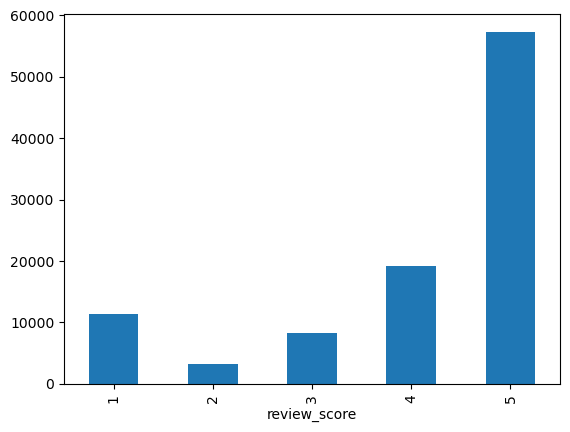

In [68]:
reviews_df["review_score"].value_counts().sort_index().plot(kind="bar")

The bar chart confirms the concentration of high review scores
and highlights the limited frequency of low ratings.

### Temporal Analysis – Reviews

In [69]:
reviews_monthly = reviews_df.set_index("review_creation_date").resample("ME").size()

reviews_monthly.head()

review_creation_date
2016-10-31     179
2016-11-30     101
2016-12-31      45
2017-01-31     239
2017-02-28    1413
Freq: ME, dtype: int64

<Axes: title={'center': 'Monthly number of reviews'}, xlabel='review_creation_date'>

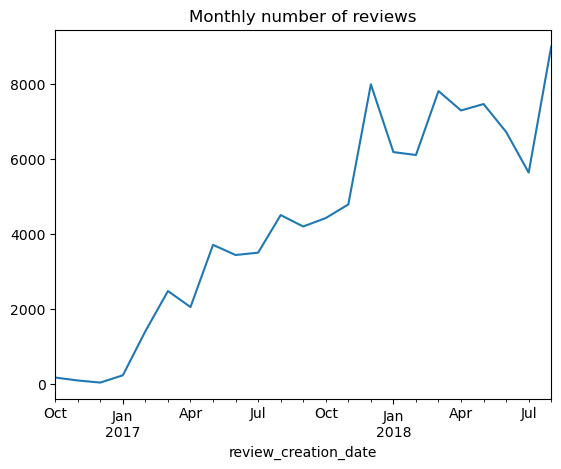

In [70]:
reviews_monthly.plot(title="Monthly number of reviews")


In [71]:
avg_score_monthly = (
    reviews_df.set_index("review_creation_date").resample("ME")["review_score"].mean()
)

avg_score_monthly.head()

review_creation_date
2016-10-31    4.055866
2016-11-30    3.188119
2016-12-31    2.355556
2017-01-31    4.338912
2017-02-28    4.280962
Freq: ME, Name: review_score, dtype: float64

<Axes: title={'center': 'Average Review Score Over Time'}, xlabel='review_creation_date'>

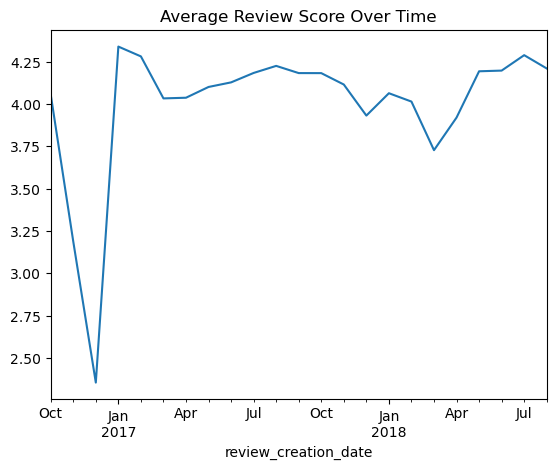

In [72]:
avg_score_monthly.plot(title="Average Review Score Over Time")


In [73]:
# .dt access for treat the review_creation_date data like date
reviews_df["review_weekday"] = reviews_df["review_creation_date"].dt.day_name()
weekday_counts = reviews_df["review_weekday"].value_counts()

response_time_monthly = reviews_df.set_index("review_creation_date").resample("ME")[
    "response_time_days"
]

print(weekday_counts)

print("\n", response_time_monthly.head())


review_weekday
Wednesday    19156
Thursday     18825
Tuesday      18139
Friday       17770
Saturday     17766
Sunday        6475
Monday        1093
Name: count, dtype: int64

 review_creation_date
2016-10-02    24.521528
2016-10-06     1.772546
2016-10-09     2.605197
2016-10-15     2.876956
2016-10-15     1.139086
                ...    
2018-08-01     0.786493
2018-08-01     6.567731
2018-08-01     1.424398
2018-08-01     0.989491
2018-08-01     2.691944
Name: response_time_days, Length: 115, dtype: float64


count    99224.000000
mean         3.148993
std          9.890049
min          0.089225
25%          1.004870
50%          1.674948
75%          3.103565
max        518.699213
Name: response_time_days, dtype: float64


<Axes: title={'center': 'Median response time over months'}, xlabel='review_creation_date'>

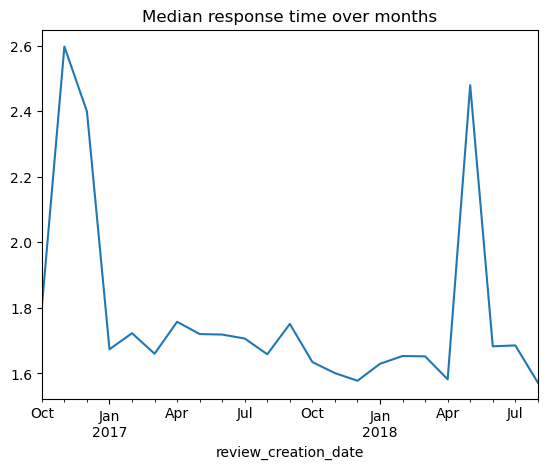

In [74]:
print(reviews_df["response_time_days"].describe())
response_time_monthly.median().plot(title="Median response time over months")

review_creation_date
2016-10-31     179
2016-11-30     101
2016-12-31      45
2017-01-31     239
2017-02-28    1413
2017-03-31    2481
2017-04-30    2055
2017-05-31    3710
2017-06-30    3440
2017-07-31    3503
2017-08-31    4503
2017-09-30    4199
2017-10-31    4424
2017-11-30    4786
2017-12-31    7982
2018-01-31    6179
2018-02-28    6101
2018-03-31    7803
2018-04-30    7287
2018-05-31    7458
2018-06-30    6715
2018-07-31    5634
2018-08-31    8987
Freq: ME, Name: response_time_days, dtype: int64


<Axes: title={'center': 'Count response time over months'}, xlabel='review_creation_date'>

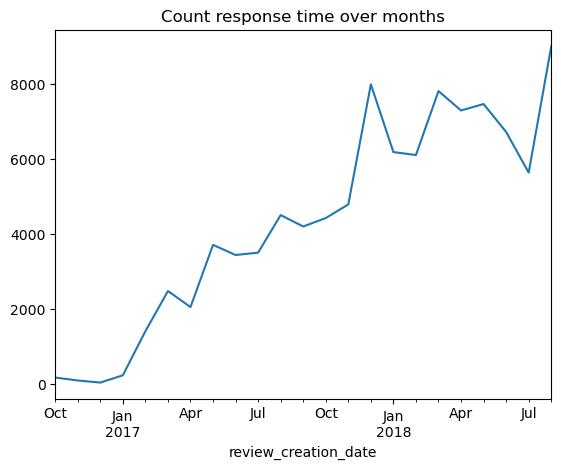

In [75]:
print(response_time_monthly.size())

response_time_monthly.size().plot(title="Count response time over months")

In [76]:
response_time_monthly.quantile(0.9)


review_creation_date
2016-10-31    12.223819
2016-11-30     8.082025
2016-12-31    15.539852
2017-01-31     3.956444
2017-02-28     5.006942
2017-03-31     4.741377
2017-04-30     5.027942
2017-05-31     4.941963
2017-06-30     4.635316
2017-07-31     4.815086
2017-08-31     4.685111
2017-09-30     4.939356
2017-10-31     4.784668
2017-11-30     4.802946
2017-12-31     5.392294
2018-01-31     4.965100
2018-02-28     5.097188
2018-03-31     4.849403
2018-04-30     4.651067
2018-05-31     5.463065
2018-06-30     4.927942
2018-07-31     4.698325
2018-08-31     4.490060
Freq: ME, Name: response_time_days, dtype: float64

### Response time analysis

In [77]:
reviews_df["response_time_days"] = (
    reviews_df["review_answer_timestamp"] - reviews_df["review_creation_date"]
)
reviews_df["response_time_days"]

0       0 days 21:46:59
1       1 days 03:05:13
2       1 days 14:36:24
3       0 days 22:02:06
4       1 days 10:26:53
              ...      
99219   7 days 17:18:30
99220   2 days 20:06:42
99221   1 days 09:10:43
99222   1 days 12:59:13
99223   0 days 21:01:49
Name: response_time_days, Length: 99224, dtype: timedelta64[ns]

In [78]:
reviews_df["response_time_days"].dt.days.describe()

count    99224.000000
mean         2.582248
std          9.890526
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        518.000000
Name: response_time_days, dtype: float64

Median is better than mean due to skewness

long tail suggest rare but extreme delays

In [79]:
print(reviews_df[reviews_df["response_time_days"] < pd.Timedelta(0)].shape)

print(reviews_df["response_time_days"].value_counts().head(7))
reviews_df["response_time_days"].dt.days.value_counts().sort_index().head(7)

(0, 14)
response_time_days
1 days 00:44:33    7
0 days 23:36:35    6
1 days 00:36:16    6
1 days 01:17:50    6
0 days 23:14:11    6
1 days 01:06:17    6
1 days 10:53:21    6
Name: count, dtype: int64


response_time_days
0    24361
1    30995
2    15898
3    14062
4     4601
5     2691
6     1702
Name: count, dtype: int64

The same day and next day predominates (0 and 1).  

In [80]:
# To see reviews answered on the same day

answered_same_day = reviews_df[reviews_df["response_time_days"] < pd.Timedelta(days=1)][
    ["review_creation_date", "review_answer_timestamp"]
]
print(answered_same_day.head())
print("\n", answered_same_day.count())


   review_creation_date review_answer_timestamp
0            2018-01-18     2018-01-18 21:46:59
3            2017-04-21     2017-04-21 22:02:06
7            2018-08-14     2018-08-14 21:36:06
19           2018-08-15     2018-08-15 04:10:37
26           2017-11-01     2017-11-01 20:25:30

 review_creation_date       24361
review_answer_timestamp    24361
dtype: int64


In [81]:
long_responses = reviews_df[reviews_df["response_time_days"] > pd.Timedelta(days=30)]
print(long_responses.shape)
print((long_responses.shape[0] / reviews_df["response_time_days"].count()) * 100)

(682, 14)
0.6873337095863904


Only 0.68% of reviews have a response greater than 30days, indicating that extreme day delays are rare and would be treated as outliers

In [82]:
print(reviews_df["response_time_days"].quantile([0.90, 0.95, 0.99]))


0.90    4 days 20:33:08.899999999
0.95    6 days 23:19:57.199999999
0.99   22 days 01:42:01.340000006
Name: response_time_days, dtype: timedelta64[ns]


In [83]:
long_responses[
    [
        "review_creation_date",
        "review_answer_timestamp",
        "response_time_days",
        "review_score",
    ]
].head(10)

,review_creation_date,review_answer_timestamp,response_time_days,review_score
23,2017-09-09,2017-10-17 02:25:47,38 days 02:25:47,5
131,2018-01-20,2018-05-15 00:45:28,115 days 00:45:28,3
195,2018-02-23,2018-03-26 18:13:48,31 days 18:13:48,5
206,2017-02-24,2017-04-01 02:29:39,36 days 02:29:39,5
368,2017-09-21,2018-02-14 10:53:24,146 days 10:53:24,5
380,2017-10-08,2017-11-10 16:24:28,33 days 16:24:28,1
409,2017-08-17,2017-11-05 15:18:55,80 days 15:18:55,5
791,2018-05-05,2018-08-05 10:44:32,92 days 10:44:32,4
1150,2017-04-28,2017-06-17 18:54:56,50 days 18:54:56,5
1259,2017-09-15,2017-11-13 12:29:57,59 days 12:29:57,5


In [84]:
print(long_responses["review_score"].value_counts(normalize=True))
reviews_df["review_score"].value_counts(normalize=True)

review_score
5    0.607038
4    0.165689
1    0.123167
3    0.068915
2    0.035191
Name: proportion, dtype: float64


review_score
5    0.577763
4    0.192917
1    0.115133
3    0.082430
2    0.031756
Name: proportion, dtype: float64

Reviews with long responses show a slightly higher rate of 5 star than "normal responses" (<30days) 

<Axes: ylabel='Frequency'>

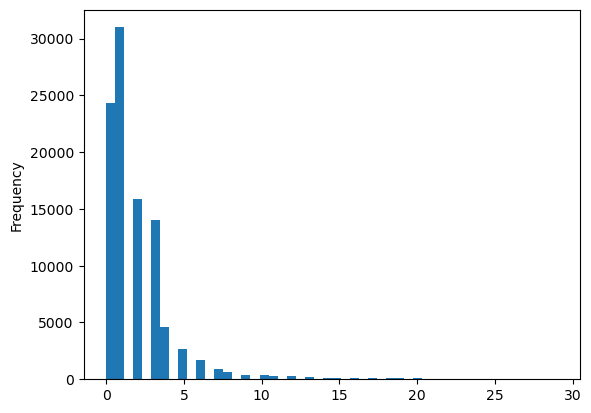

In [85]:
reviews_df.loc[
    reviews_df["response_time_days"] <= pd.Timedelta(days=30), "response_time_days"
].dt.days.plot(kind="hist", bins=50)


<Axes: ylabel='Frequency'>

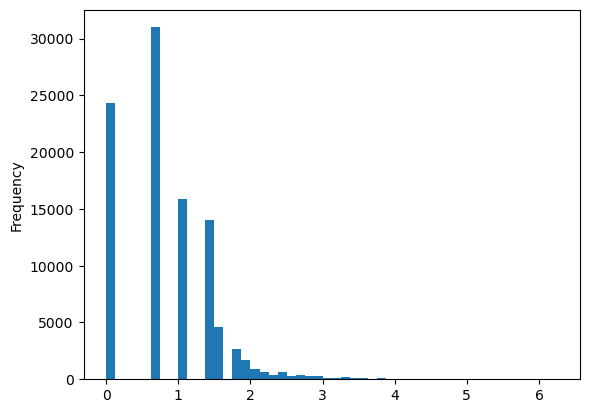

In [86]:
import numpy as np

np.log1p(reviews_df["response_time_days"].dt.days).plot(kind="hist", bins=50)


### Bivariate analysis
Understand how customer satisfaction relates to operational behavior.

In [87]:
reviews_df.groupby("review_score")["response_time_days"].describe()

,count,mean,std,min,25%,50%,75%,max
review_score,,,,,,,,
1,11424,3 days 01:13:03.087797619,10 days 13:04:09.269003075,0 days 02:24:24,0 days 18:16:57.750000,1 days 13:11:16.500000,2 days 23:59:20.750000,518 days 16:46:52
2,3151,3 days 00:05:55.842272294,6 days 11:50:25.330036036,0 days 02:37:06,0 days 23:22:02.500000,1 days 16:47:38,3 days 02:47:28.500000,143 days 00:37:55
3,8179,2 days 23:32:53.092187308,6 days 02:31:01.255152098,0 days 02:08:29,1 days 00:30:12,1 days 18:15:26,3 days 04:55:54,202 days 02:35:20
4,19142,3 days 02:53:25.246630446,8 days 21:26:00.356554479,0 days 02:25:19,1 days 01:03:57,1 days 18:56:13.500000,3 days 09:50:30.750000,471 days 16:19:53
5,57328,3 days 05:02:25.567488836,10 days 15:13:34.853127273,0 days 02:38:01,1 days 00:24:19,1 days 15:44:44.500000,3 days 02:06:56.500000,512 days 15:47:37


Does customer satisfaction relate to response speed?

The review dataset provides valuable insight into customer satisfaction
and platform responsiveness. Review scores are generally high, with
most responses delivered within a few days. Faster response times
are weakly associated with higher satisfaction, suggesting that
operational efficiency plays a role in customer perception,
though other factors are also involved.


### Cross table analysis

reviews ↔ orders

reviews ↔ deliveries

reviews ↔ payments

reviews ↔ products

In [88]:
print(payments_df.columns)
print("\n", "Percentage of payment_type used")
payments_df["payment_type"].value_counts(normalize=True) * 100

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

 Percentage of payment_type used


payment_type
credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: proportion, dtype: float64

In [89]:
def resolve_payment_type(x):
    types = x.dropna().unique()
    if len(types) == 1:
        return types[0]
    elif len(types) == 0:
        return pd.NA
    else:
        return "mixed"


payments_order = payments_df.groupby("order_id").agg(
    payment_installments=("payment_installments", "max"),
    payment_value=("payment_value", "sum"),
    payment_type=("payment_type", resolve_payment_type),
)


Since multiple payments can be associated with a single order, payment information was first aggregated at the order level before analyzing its relationship with review scores. This avoids duplication bias and ensures a consistent unit of analysis.

I decided to use **mode** on the column `payment_type` because credit_card has 73% of payments.

In [90]:
reviews_orders_payments = reviews_df.merge(payments_order, on="order_id", how="inner")
reviews_orders_payments.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99223 entries, 0 to 99222
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   review_id                99223 non-null  object         
 1   order_id                 99223 non-null  object         
 2   review_score             99223 non-null  int64          
 3   review_comment_title     11568 non-null  object         
 4   review_comment_message   40976 non-null  object         
 5   review_creation_date     99223 non-null  datetime64[ns] 
 6   review_answer_timestamp  99223 non-null  datetime64[ns] 
 7   response_time            99223 non-null  timedelta64[ns]
 8   response_time_days       99223 non-null  timedelta64[ns]
 9   rt_days_round1           99223 non-null  float64        
 10  review_weekday           99223 non-null  object         
 11  has_comment_message      99223 non-null  bool           
 12  has_comment_messag

In [91]:
reviews_orders_payments.head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,response_time,response_time_days,rt_days_round1,review_weekday,has_comment_message,has_comment_message_p,comment_len,payment_installments,payment_value,payment_type
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,0 days 21:46:59,0 days 21:46:59,1.0,Thursday,False,False,0,8,397.26,credit_card
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,1 days 03:05:13,1 days 03:05:13,1.0,Saturday,False,False,0,1,88.09,credit_card
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,1 days 14:36:24,1 days 14:36:24,2.0,Saturday,False,False,0,1,194.12,credit_card
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,0 days 22:02:06,0 days 22:02:06,1.0,Friday,True,True,37,1,222.84,credit_card
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1 days 10:26:53,1 days 10:26:53,1.0,Thursday,True,True,100,10,1333.25,credit_card


**For each review score, how do payment installments behave?**

In [92]:
reviews_orders_payments.groupby("review_score")["payment_installments"].describe()


,count,mean,std,min,25%,50%,75%,max
review_score,,,,,,,,
1,11423.0,3.188217,2.931503,1.0,1.0,2.0,4.0,24.0
2,3151.0,3.063472,2.779820,1.0,1.0,2.0,4.0,24.0
3,8179.0,2.943881,2.693553,1.0,1.0,2.0,4.0,24.0
4,19142.0,2.825462,2.628465,1.0,1.0,2.0,4.0,24.0
5,57328.0,2.907026,2.697462,0.0,1.0,2.0,4.0,24.0


**Is there an association between payment methods and review scores?**

In [93]:
# gp = groupby; ct = cross table
gp_payment_type_ct = reviews_orders_payments.groupby("payment_type")
print(gp_payment_type_ct["review_score"].describe())


                count      mean       std  min  25%  50%  75%  max
payment_type                                                      
boleto        19762.0  4.086631  1.339223  1.0  4.0  5.0  5.0  5.0
credit_card   74074.0  4.088506  1.348488  1.0  4.0  5.0  5.0  5.0
debit_card     1528.0  4.168194  1.295242  1.0  4.0  5.0  5.0  5.0
mixed          2239.0  4.068334  1.340999  1.0  4.0  5.0  5.0  5.0
not_defined       3.0  1.666667  1.154701  1.0  1.0  1.0  2.0  3.0
voucher        1617.0  3.942486  1.447867  1.0  3.0  5.0  5.0  5.0


In [94]:
gp_payment_type_ct["review_score"].mean()

payment_type
boleto         4.086631
credit_card    4.088506
debit_card     4.168194
mixed          4.068334
not_defined    1.666667
voucher        3.942486
Name: review_score, dtype: float64

Payment method doesn't appear to be a STRONG differentiator of customer satisfaction, as average scores are similar across the main payment types  

**How is the distribution of review scores different across payment methods?**

In [95]:
# Percentage of each payment type with it's corresponding score review
(
    pd.crosstab(
        reviews_orders_payments["payment_type"],
        reviews_orders_payments["review_score"],
        normalize="index",
    )
) * 100


review_score,1,2,3,4,5
payment_type,,,,,
boleto,11.284283,3.147455,8.566947,19.623520,57.377796
credit_card,11.554662,3.149553,8.109458,19.263169,57.923158
debit_card,10.013089,3.010471,7.722513,18.651832,60.602094
mixed,11.210362,3.439035,9.111210,19.785619,56.453774
not_defined,66.666667,0.000000,33.333333,0.000000,0.000000
voucher,14.100186,4.514533,9.647495,16.512059,55.225727


the crosstable show a slightly higher satisfaction around 60%

However, differences are modest and likely influenced by confounding variables such as delivery performance and order value.

**Does the payment method relate to the average order value?**

In [96]:
reviews_orders_payments.groupby("payment_type")["payment_value"].mean()


payment_type
boleto         144.468993
credit_card    166.620273
debit_card     142.776165
mixed          149.492238
not_defined      0.000000
voucher        112.277662
Name: payment_value, dtype: float64

Different payment methods are associated with different average order values, suggesting that customers choosing certain payment types tend to place higher-value orders.
Boleto and debit_card are pretty similar

credit_card has more average than the other payments

***Review x Order***

How delivery performance affects customer satisfaction?


In [97]:
orders_cols = [
    "order_id",
    "order_status",
    "order_purchase_timestamp",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
]

orders_subset = orders_df[orders_cols]


In [98]:
reviews_orders = reviews_df.merge(orders_subset, on="order_id", how="left")
print(reviews_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   review_id                      99224 non-null  object         
 1   order_id                       99224 non-null  object         
 2   review_score                   99224 non-null  int64          
 3   review_comment_title           11568 non-null  object         
 4   review_comment_message         40977 non-null  object         
 5   review_creation_date           99224 non-null  datetime64[ns] 
 6   review_answer_timestamp        99224 non-null  datetime64[ns] 
 7   response_time                  99224 non-null  timedelta64[ns]
 8   response_time_days             99224 non-null  timedelta64[ns]
 9   rt_days_round1                 99224 non-null  float64        
 10  review_weekday                 99224 non-null  object         
 11  ha

To preserve data integrity, analytical views were created by merging
only the necessary columns for each specific analysis, while keeping
the original datasets unchanged.


In [99]:
reviews_orders["order_delivered_customer_date"] = pd.to_datetime(
    reviews_orders["order_delivered_customer_date"], errors="coerce"
)
reviews_orders["order_estimated_delivery_date"] = pd.to_datetime(
    reviews_orders["order_estimated_delivery_date"], errors="coerce"
)


Feature engineering: delivery_delay_days

Quantitative measure about the delivery perfomance

In [100]:
reviews_orders["delivery_delay_days"] = (
    reviews_orders["order_delivered_customer_date"]
    - reviews_orders["order_estimated_delivery_date"]
)
reviews_orders["delivery_delay_days"].dt.days

0       -16.0
1        -5.0
2       -21.0
3       -20.0
4        -9.0
         ... 
99219   -14.0
99220   -12.0
99221   -16.0
99222   -16.0
99223   -10.0
Name: delivery_delay_days, Length: 99224, dtype: float64

Negative values -> Order delivered earlier than estimated

Zero -> Delivered on time

Positive values -> Delivered later than estimated


In [101]:
print(
    reviews_orders[
        [
            "order_delivered_customer_date",
            "order_estimated_delivery_date",
            "delivery_delay_days",
        ]
    ].head()
)

reviews_orders[
    [
        "order_delivered_customer_date",
        "order_estimated_delivery_date",
        "delivery_delay_days",
    ]
].describe()

  order_delivered_customer_date order_estimated_delivery_date  \
0           2018-01-17 18:42:41                    2018-02-02   
1           2018-03-09 23:17:20                    2018-03-14   
2           2018-02-16 17:28:48                    2018-03-09   
3           2017-04-20 09:08:35                    2017-05-10   
4           2018-02-28 16:33:35                    2018-03-09   

  delivery_delay_days  
0  -16 days +18:42:41  
1   -5 days +23:17:20  
2  -21 days +17:28:48  
3  -20 days +09:08:35  
4   -9 days +16:33:35  


,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay_days
count,96359,99224,96359
mean,2018-01-14 06:59:06.953257984,2018-01-23 23:17:34.777069824,-12 days +18:43:11.575971109
min,2016-10-11 13:46:32,2016-09-30 00:00:00,-147 days +23:36:47
25%,2017-09-25 20:34:31.500000,2017-10-03 00:00:00,-17 days +17:58:00.500000
50%,2018-02-02 17:32:40,2018-02-15 00:00:00,-12 days +00:36:31
75%,2018-05-15 21:08:15.500000,2018-05-25 00:00:00,-7 days +14:08:51.500000
max,2018-10-17 13:22:46,2018-11-12 00:00:00,188 days 23:24:07
std,NaN,NaN,10 days 02:47:38.331570028


In [102]:
print(reviews_orders.groupby("review_score")["delivery_delay_days"].median())
reviews_orders.groupby("review_score")["delivery_delay_days"].describe()


review_score
1          -11 days +23:11:38
2          -11 days +18:09:24
3          -12 days +23:46:36
4   -12 days +06:35:22.500000
5   -13 days +15:54:27.500000
Name: delivery_delay_days, dtype: timedelta64[ns]


,count,mean,std,min,25%,50%,75%,max
review_score,,,,,,,,
1,9409,-4 days +15:06:17.729939420,16 days 01:01:45.733293879,-69 days +13:12:08,-14 days +11:51:24,-7 days +14:42:33,6 days 19:39:28,175 days 20:51:31
2,2941,-8 days +01:29:14.509350561,12 days 16:18:51.178623446,-56 days +18:35:30,-15 days +00:39:19,-10 days +16:38:03,-3 days +19:08:29,188 days 23:24:07
3,7962,-11 days +22:06:58.198693796,10 days 09:15:14.667748978,-135 days +16:35:43,-16 days +16:25:42.250000,-11 days +15:18:09,-6 days +18:31:57,162 days 17:14:25
4,18987,-12 days +07:34:55.792805604,9 days 01:27:38.407298308,-75 days +20:12:03,-17 days +20:36:48.500000,-12 days +12:07:48,-7 days +10:08:59,161 days 18:36:29
5,57060,-13 days +07:28:45.493866106,8 days 03:53:10.595816637,-147 days +23:36:47,-18 days +22:53:59,-13 days +16:20:45.500000,-8 days +12:22:26.750000,155 days 10:56:45


In [103]:
reviews_orders["delivery_status"] = reviews_orders["delivery_delay_days"].apply(
    lambda x: "Late delivery" if x > pd.Timedelta(0) else "On time or early"
)
print(reviews_orders.groupby("review_score")["delivery_status"].value_counts())

(
    reviews_orders.groupby("review_score")["delivery_status"].value_counts(
        normalize=True
    )
) * 100


review_score  delivery_status 
1             On time or early     7870
              Late delivery        3554
2             On time or early     2545
              Late delivery         606
3             On time or early     7303
              Late delivery         876
4             On time or early    18188
              Late delivery         954
5             On time or early    55617
              Late delivery        1711
Name: count, dtype: int64


review_score  delivery_status 
1             On time or early    68.890056
              Late delivery       31.109944
2             On time or early    80.768010
              Late delivery       19.231990
3             On time or early    89.289644
              Late delivery       10.710356
4             On time or early    95.016195
              Late delivery        4.983805
5             On time or early    97.015420
              Late delivery        2.984580
Name: proportion, dtype: float64

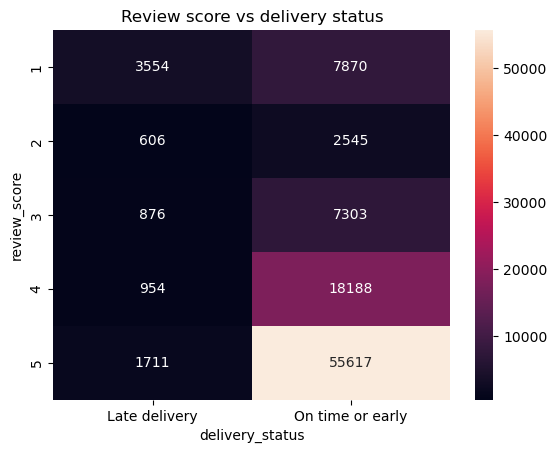

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

ct_counts = reviews_orders.groupby(["review_score", "delivery_status"]).size().unstack()

sns.heatmap(ct_counts, annot=True, fmt="d")
plt.title("Review score vs delivery status")
plt.show()

Reviews <--> Payments



¿Does paying with installments affect perception on clients?

¿Complex payment plans generate more negative reviews?

¿The amount paid affect the review score?

In [105]:
reviews_payments = reviews_df.merge(
    orders_df[["order_id"]], on="order_id", how="inner"
).merge(payments_df, on="order_id", how="inner")

reviews_payments[
    ["review_score", "payment_type", "payment_installments", "payment_value"]
].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103677 entries, 0 to 103676
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   review_score          103677 non-null  int64  
 1   payment_type          103677 non-null  object 
 2   payment_installments  103677 non-null  int64  
 3   payment_value         103677 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ MB


In [106]:
print(reviews_payments["review_score"].count())
reviews_payments["review_score"].value_counts()

103677


review_score
5    59822
4    20008
1    11974
3     8543
2     3330
Name: count, dtype: int64

In [107]:
print(
    reviews_payments[
        ["review_score", "payment_type", "payment_installments", "payment_value"]
    ]
)
reviews_payments[
    ["review_score", "payment_type", "payment_installments", "payment_value"]
].describe()

        review_score payment_type  payment_installments  payment_value
0                  4  credit_card                     8         397.26
1                  5  credit_card                     1          88.09
2                  5  credit_card                     1         194.12
3                  5  credit_card                     1         222.84
4                  5  credit_card                    10        1333.25
...              ...          ...                   ...            ...
103672             5  credit_card                     8         287.97
103673             5  credit_card                     1         209.76
103674             5  credit_card                     6         231.56
103675             4  credit_card                     1          66.41
103676             1       boleto                     1          40.68

[103677 rows x 4 columns]


,review_score,payment_installments,payment_value
count,103677.000000,103677.000000,103677.000000
mean,4.083886,2.854085,153.666237
std,1.349185,2.687863,215.889863
min,1.000000,0.000000,0.000000
25%,4.000000,1.000000,56.780000
50%,5.000000,1.000000,99.950000
75%,5.000000,4.000000,171.490000
max,5.000000,24.000000,13664.080000


**Is there an association between payment methods and review scores?**

In [108]:
cross_table_reviews_payment = (
    reviews_payments.groupby(["payment_type", "review_score"]).size().unstack()
)
cross_table_payment_norm = cross_table_reviews_payment.div(
    cross_table_reviews_payment.sum(axis=1), axis=0
)

print(cross_table_payment_norm)
cross_table_reviews_payment


review_score         1         2         3         4         5
payment_type                                                  
boleto        0.112843  0.031475  0.085669  0.196235  0.573778
credit_card   0.115509  0.031619  0.081358  0.192755  0.578760
debit_card    0.100065  0.030085  0.077175  0.187050  0.605625
not_defined   0.666667       NaN  0.333333       NaN       NaN
voucher       0.128134  0.041501  0.086287  0.186581  0.557496


review_score,1,2,3,4,5
payment_type,,,,,
boleto,2230.0,622.0,1693.0,3878.0,11339.0
credit_card,8848.0,2422.0,6232.0,14765.0,44333.0
debit_card,153.0,46.0,118.0,286.0,926.0
not_defined,2.0,NaN,1.0,NaN,NaN
voucher,741.0,240.0,499.0,1079.0,3224.0


In [109]:
reviews_payments.groupby("review_score")["payment_installments"].describe()

,count,mean,std,min,25%,50%,75%,max
review_score,,,,,,,,
1,11974.0,3.093118,2.901069,1.0,1.0,2.0,4.0,24.0
2,3330.0,2.963363,2.749015,1.0,1.0,2.0,4.0,24.0
3,8543.0,2.865504,2.665643,1.0,1.0,2.0,4.0,24.0
4,20008.0,2.750400,2.598636,1.0,1.0,1.0,4.0,24.0
5,59822.0,2.833205,2.669586,0.0,1.0,1.0,4.0,24.0


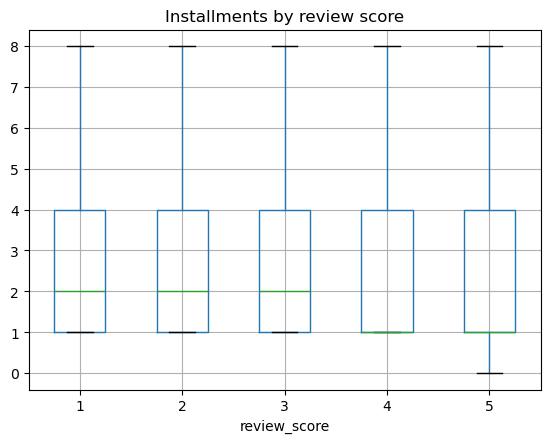

In [110]:
reviews_payments.boxplot(
    column="payment_installments", by="review_score", showfliers=False
)
plt.title("Installments by review score")
plt.suptitle("")
plt.show()


In [111]:
cross_table_reviews_payments = reviews_payments.groupby("review_score")[
    "payment_installments"
]
cross_table_reviews_payment.describe()

review_score,1,2,3,4,5
count,5.000000,4.000000,5.000000,4.000000,4.000000
mean,2394.800000,832.500000,1708.600000,5002.000000,14955.500000
std,3713.393421,1086.348471,2615.837782,6688.550665,20087.903002
min,2.000000,46.000000,1.000000,286.000000,926.000000
25%,153.000000,191.500000,118.000000,880.750000,2649.500000
50%,741.000000,431.000000,499.000000,2478.500000,7281.500000
75%,2230.000000,1072.000000,1693.000000,6599.750000,19587.500000
max,8848.000000,2422.000000,6232.000000,14765.000000,44333.000000


# 3. Sellers

In [112]:
sellers_df = pd.read_csv(RAW_DATA / "olist_sellers_dataset.csv")

print("Shape of sellers df:", "\n")
print(sellers_df.shape)
print("Overview:", "\n")
sellers_df.head()

Shape of sellers df: 

(3095, 4)
Overview: 



,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [113]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [114]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [115]:
count = sellers_df["seller_city"].value_counts()
percentage = (sellers_df["seller_city"].value_counts(normalize=True) * 100).round(2)
sellers = pd.concat([count, percentage], axis=1)
sellers.columns = ["Count", "%"]
sellers

,Count,%
seller_city,,
sao paulo,694,22.42
curitiba,127,4.10
rio de janeiro,96,3.10
belo horizonte,68,2.20
ribeirao preto,52,1.68
...,...,...
ipua,1,0.03
muqui,1,0.03
timoteo,1,0.03


In [116]:
print("Number of unique sellers:", sellers_df["seller_id"].nunique())


Number of unique sellers: 3095


 **Observations**:
 - `seller_id` acts as a unique identifier with no duplicates.
 - All columns are categorical (although seller_zip_code_prefix) and describe seller location.
 - No numerical or temporal features are present.
 - Df is clean and ready for joins with order_items and orders.

# Products

In [117]:
# Translate the product category names df before analyze
product_category_translation_df = pd.read_csv(
    RAW_DATA / "product_category_name_translation.csv"
)
print(product_category_translation_df.columns)
products_df = pd.read_csv(RAW_DATA / "olist_products_dataset.csv")
products_df = products_df.merge(
    product_category_translation_df, how="left", on="product_category_name"
)
print("Products shape:", "\n")
print(products_df.shape)
print("Columns:", "\n")
print(products_df.columns)
print("Overview:", "\n")
products_df.head()

Index(['product_category_name', 'product_category_name_english'], dtype='object')
Products shape: 

(32951, 10)
Columns: 

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')
Overview: 



,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [118]:
print(products_df["product_category_name_english"].isna().sum())
print(products_df[products_df["product_category_name_english"].isna()].head())
print("\n", products_df["product_category_name"].count())

623
                           product_id product_category_name  \
105  a41e356c76fab66334f36de622ecbd3a                   NaN   
128  d8dee61c2034d6d075997acef1870e9b                   NaN   
145  56139431d72cd51f19eb9f7dae4d1617                   NaN   
154  46b48281eb6d663ced748f324108c733                   NaN   
197  5fb61f482620cb672f5e586bb132eae9                   NaN   

     product_name_lenght  product_description_lenght  product_photos_qty  \
105                  NaN                         NaN                 NaN   
128                  NaN                         NaN                 NaN   
145                  NaN                         NaN                 NaN   
154                  NaN                         NaN                 NaN   
197                  NaN                         NaN                 NaN   

     product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
105             650.0               17.0               14.0              12.0  

In [119]:
print("Unique values of products:", products_df["product_id"].nunique())
print(
    "Unique values of product category names:",
    products_df["product_category_name"].nunique(),
)
print(
    "Unique values of product category name (english):",
    products_df["product_category_name_english"].nunique(),
)
missing_category_names = products_df["product_category_name_english"].isna().sum()
missing_category_names_normal = products_df["product_category_name"].isna().sum()
print("Missing values: english names in product category names", missing_category_names)
print(
    "Missing values: portuguese names in product category names",
    missing_category_names_normal,
)

print(products_df[products_df["product_category_name"].isna()].shape)


Unique values of products: 32951
Unique values of product category names: 73
Unique values of product category name (english): 71
Missing values: english names in product category names 623
Missing values: portuguese names in product category names 610
(610, 10)


In [120]:
print(
    "\n",
    products_df.loc[
        products_df["product_category_name_english"].isna(),
        ["product_id", "product_category_name"],
    ].value_counts(),
)


 product_id                        product_category_name                        
0105b5323d24fc655f73052694dbbb3a  pc_gamer                                         1
1220978a08a6b29a202bc015b18250e9  portateis_cozinha_e_preparadores_de_alimentos    1
1954739d84629e7323a4295812a3e0ec  portateis_cozinha_e_preparadores_de_alimentos    1
5d923ead886c44b86845f69e50520c3e  portateis_cozinha_e_preparadores_de_alimentos    1
6727051471a0fc4a0e7737b57bff2549  pc_gamer                                         1
6fd83eb3e0799b775e4f946bd66657c0  portateis_cozinha_e_preparadores_de_alimentos    1
7afdd65f79f63819ff5bee328843fa37  portateis_cozinha_e_preparadores_de_alimentos    1
a4756663d007b0cd1af865754d08d968  portateis_cozinha_e_preparadores_de_alimentos    1
ae62bb0f95af63d64eae5f93dddea8d3  portateis_cozinha_e_preparadores_de_alimentos    1
bed164d9d628cf0593003389c535c6e0  portateis_cozinha_e_preparadores_de_alimentos    1
c7a3f1a7f9eef146cc499368b578b884  portateis_cozinha_e_preparadores_d

Some products do not have a translated category name.
These cases correspond to products with missing or undefined
original category labels, rather than translation errors.

In [121]:
print(products_df.isna().sum())

print("Zeros:", (products_df["product_weight_g"] == 0).sum())
print("NaNs:", products_df["product_weight_g"].isna().sum())

products_df.loc[
    products_df["product_weight_g"] == 0, ["product_id", "product_weight_g"]
]


product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64
Zeros: 4
NaNs: 2


,product_id,product_weight_g
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,0.0
13683,8038040ee2a71048d4bdbbdc985b69ab,0.0
14997,36ba42dd187055e1fbe943b2d11430ca,0.0
32079,e673e90efa65a5409ff4196c038bb5af,0.0


A subset of products lacks category, textual metadata, and photo
information simultaneously, indicating incomplete catalog records
rather than isolated missing fields.

Additionally, only two products present missing physical dimensions,
which appears to be an isolated data quality issue.

In [122]:
print(products_df.duplicated(subset="product_id").sum())


products_df[products_df["product_category_name"].notna()][
    "product_category_name"
].value_counts()


0


product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [123]:
# Physical dimensions
print(products_df["product_weight_g"].describe())
print(products_df["product_weight_g"].quantile([0.001, 0.95]))


count    32949.000000
mean      2276.472488
std       4282.038731
min          0.000000
25%        300.000000
50%        700.000000
75%       1900.000000
max      40425.000000
Name: product_weight_g, dtype: float64
0.001       50.0
0.950    10850.0
Name: product_weight_g, dtype: float64
